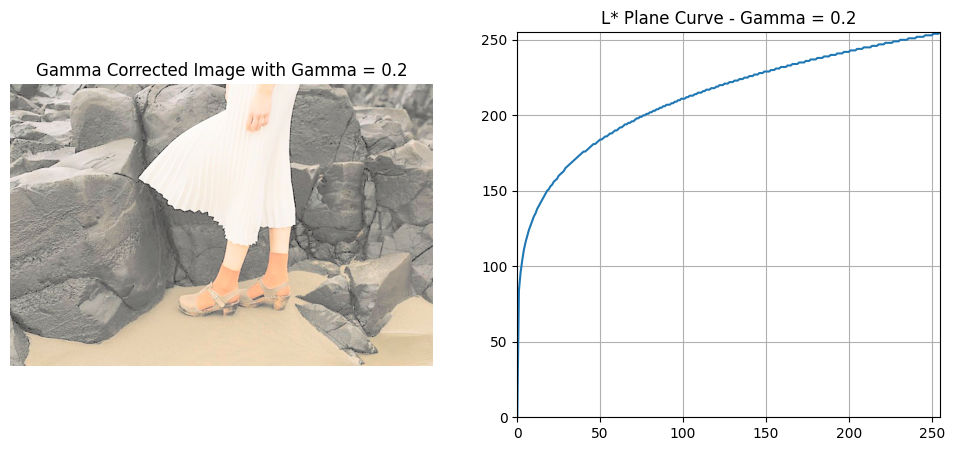

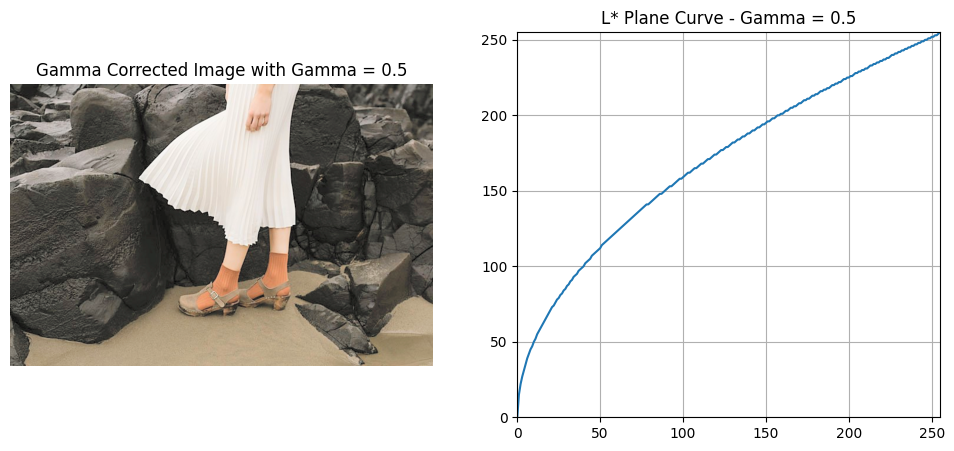

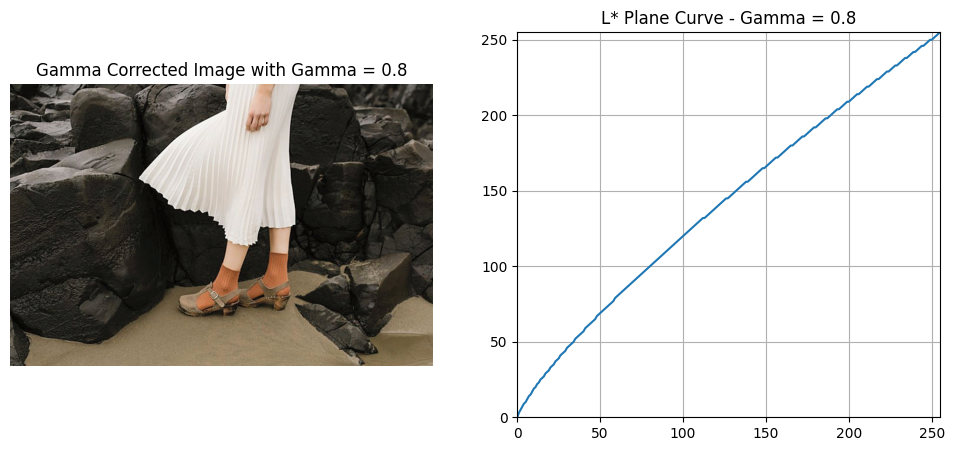

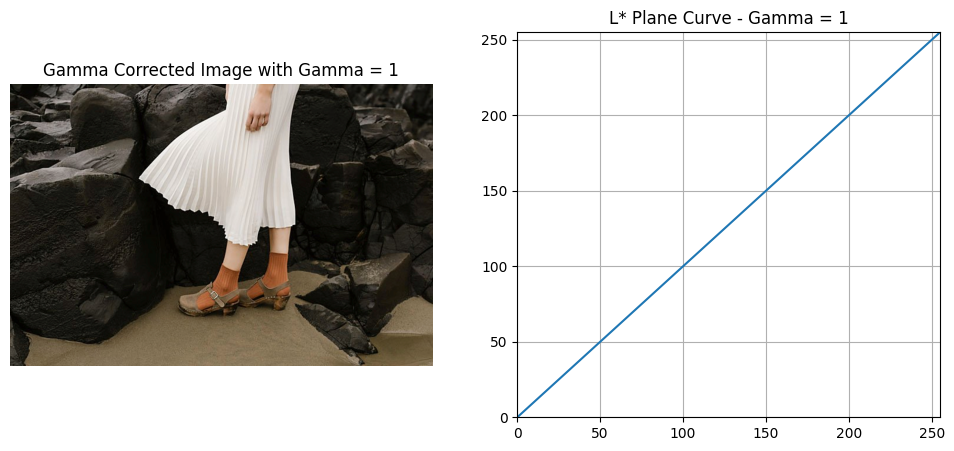

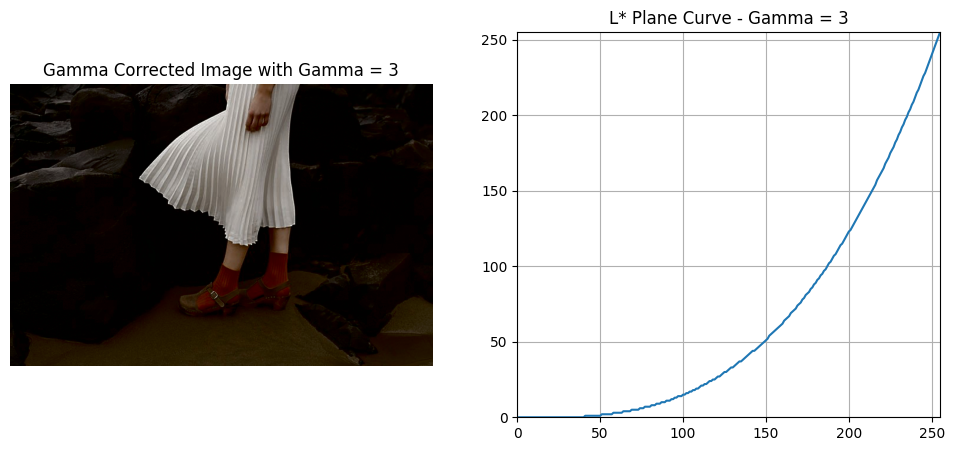

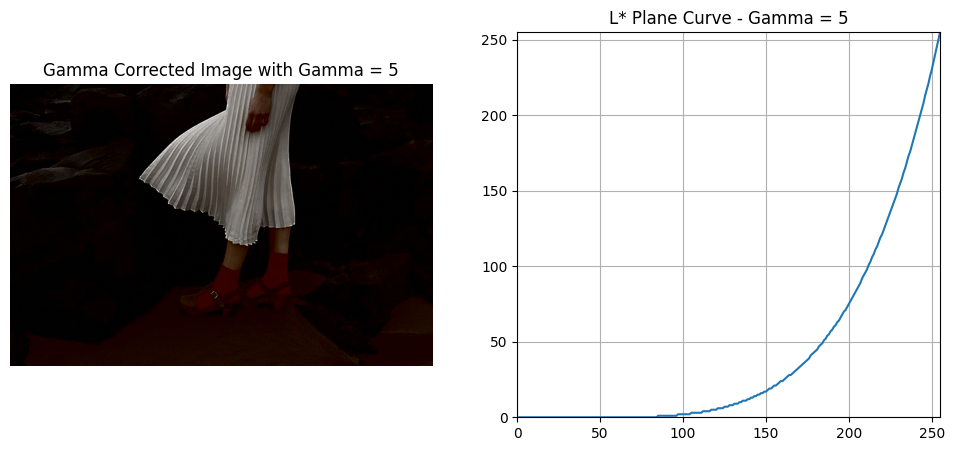

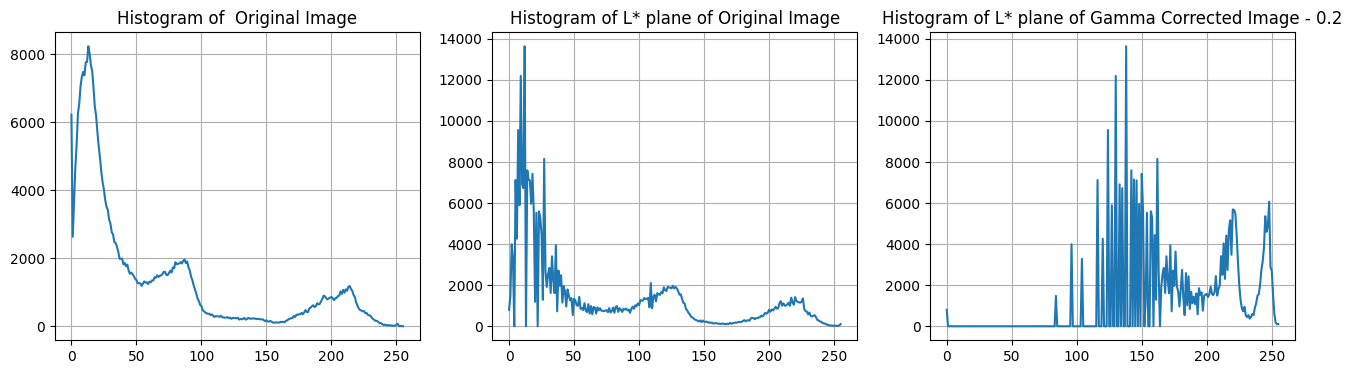

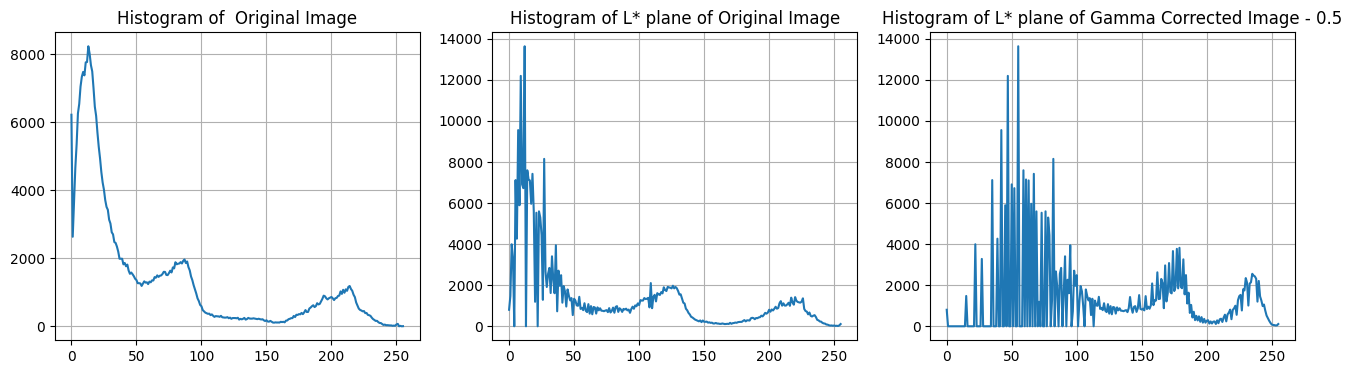

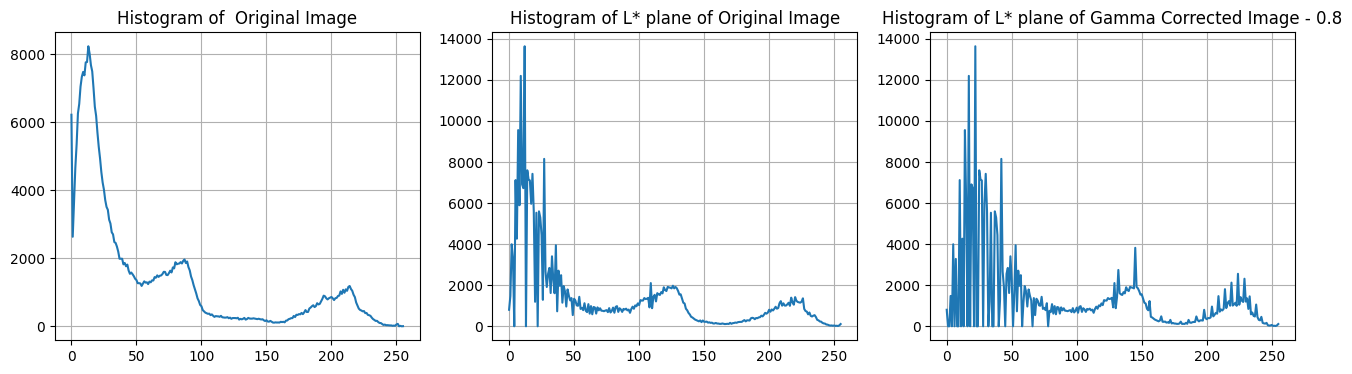

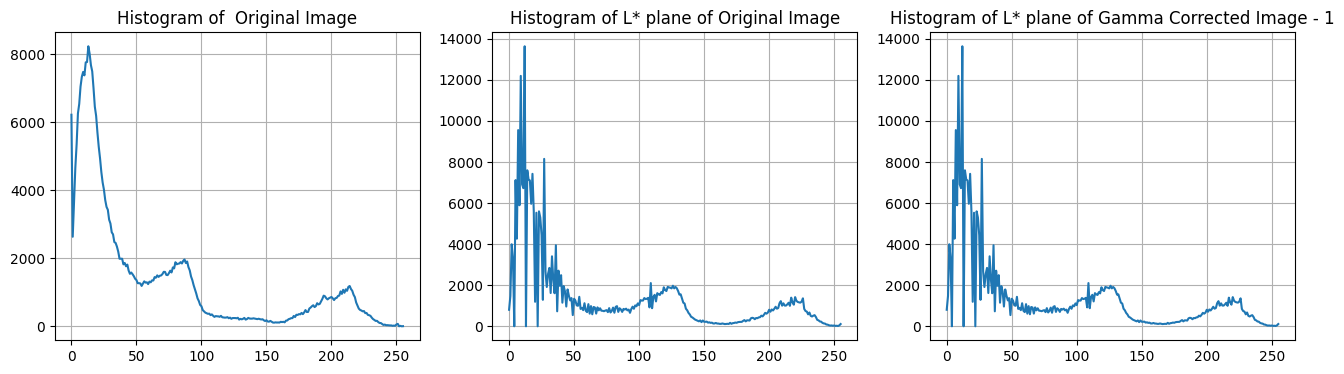

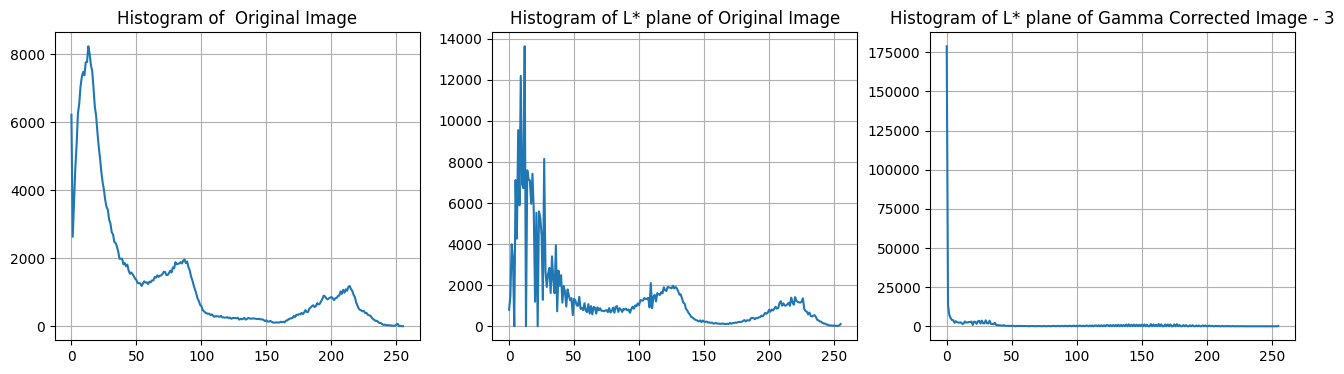

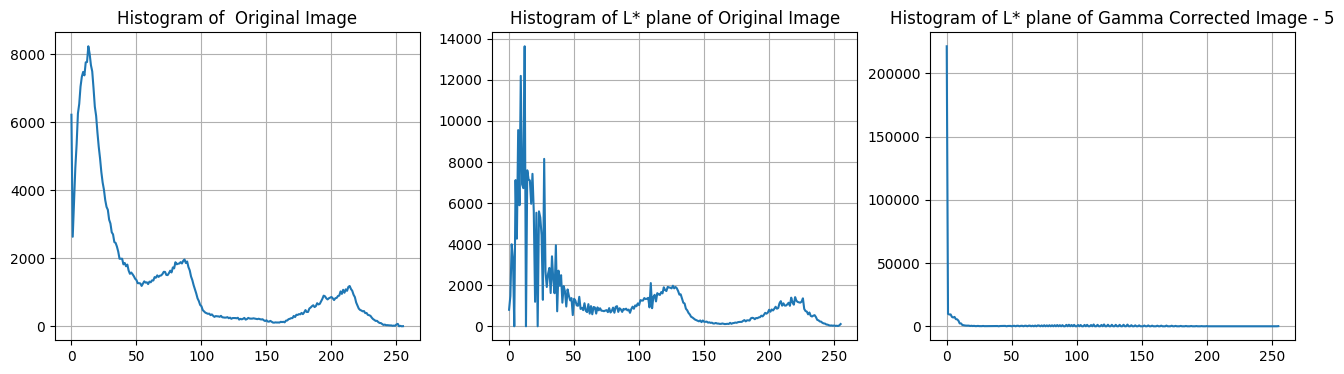

In [1]:
#q3
#plotting gamma graphs
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

gamma = [ 0.2, 0.5, 0.8, 1, 3,5]
im = cv.imread("images/highlights_and_shadows.jpg", cv.IMREAD_COLOR)
assert im is not None

lab_im= cv.cvtColor(im, cv.COLOR_BGR2Lab)
cv.imshow('Image', lab_im)
cv.waitKey(0)
cv.destroyAllWindows()

l,a,b = cv.split(lab_im)  #split into l,a,b plane

hist_l =[] # store values of l plane values in each gamma
for g in gamma:
    table= np.array([((i/255.0)**g*255.0) for i in range(0,256)]).astype(np.uint8)
    l_g = cv.LUT(l,table) # transformed l plane values
    gamma_im = cv.merge([l_g, a,b])
    hist_l.append(cv.calcHist([gamma_im], [0], None, [256], [0,256]))
    im_gc = cv.cvtColor(gamma_im, cv.COLOR_Lab2BGR)
    cv.imshow('Image',gamma_im)
    cv.waitKey(0)
    cv.destroyAllWindows()
    fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    ax[0].imshow(cv.cvtColor(im_gc ,cv.COLOR_BGR2RGB))
    ax[0].set_title("Gamma Corrected Image with Gamma = " + str(g))
    ax[0].axis('off')

    ax[1].plot(table)
    ax[1].set_title("L* Plane Curve - Gamma = " + str(g))
    ax[1].set_xlim([0, 255])
    ax[1].set_ylim([0, 255])
    ax[1].grid("on")

#part b
for i in range(len(gamma)):
    hist = cv.calcHist([im],[0],None,[256],[0,256])
    hist1 = cv.calcHist([lab_im],[0],None,[256],[0,256])
    fig, ax = plt.subplots(1, 3, figsize=(16, 4))
    ax[0].plot(hist)
    ax[0].set_title("Histogram of  Original Image")
    ax[0].grid('on')

    ax[1].plot(hist1)
    ax[1].set_title("Histogram of L* plane of Original Image")
    ax[1].grid('on')

    ax[2].plot(hist_l[i])
    ax[2].set_title("Histogram of L* plane of Gamma Corrected Image - " + str(gamma[i]))
    ax[2].grid('on')

plt.show()